In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt  


In [2]:
marketing = pd.read_csv(r'C:\\Users\\HP\\Downloads\\mybooks\\project\\ads-proj\\ad-sales-ml-proj\\data\\marketingData.csv', index_col= 0)

In [3]:
marketing.head()

,periodCode,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries
0,20200102,AdWords,adwords_bra,167.09,408,266,306,4,4
1,20200102,AdWords,adwords_dsa,31.06,370,12,11,0,0
2,20200102,AdWords,adwords_pla,10868.92,191564,2609,2667,27,27
3,20200102,AdWords,adwords_rem,762.06,24668,386,429,3,3
4,20200102,AdWords,adwords_sea,41.59,531,26,36,0,0


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 1813
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   periodCode           1814 non-null   int64  
 1   platformCode         1814 non-null   object 
 2   channelCode          1814 non-null   object 
 3   marketingInvestment  1814 non-null   float64
 4   impressions          1814 non-null   int64  
 5   clicks               1814 non-null   int64  
 6   visits               1814 non-null   int64  
 7   conversions          1814 non-null   int64  
 8   deliveries           1814 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 141.7+ KB


In [5]:
marketing['periodCode'] = marketing['periodCode'].astype(str)

In [6]:
marketing['periodCode'] = pd.to_datetime(marketing['periodCode'], format="%Y-%m-%d")

In [7]:
marketing.head()

,periodCode,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries
0,2020-01-02,AdWords,adwords_bra,167.09,408,266,306,4,4
1,2020-01-02,AdWords,adwords_dsa,31.06,370,12,11,0,0
2,2020-01-02,AdWords,adwords_pla,10868.92,191564,2609,2667,27,27
3,2020-01-02,AdWords,adwords_rem,762.06,24668,386,429,3,3
4,2020-01-02,AdWords,adwords_sea,41.59,531,26,36,0,0


In [8]:
revenue = pd.read_csv(r'C:\\Users\\HP\\Downloads\\mybooks\\project\\ads-proj\\ad-sales-ml-proj\\data\\revenueData.csv', index_col = 0)

In [9]:
revenue.head()

,createdAt,platformCode,channelCode,revenue
0,2020-01-02,AdWords,adwords_bra,5581
1,2020-01-02,AdWords,adwords_pla,60605
2,2020-01-02,AdWords,adwords_rem,2681
3,2020-01-02,HeurekaCz,heureka,15131
4,2020-01-02,RtbHouse,rtbhouse,1082


In [10]:
marketing.rename(columns = {'periodCode':'createdAt'}, inplace = True)

In [11]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1060
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   createdAt     1061 non-null   object
 1   platformCode  1061 non-null   object
 2   channelCode   1061 non-null   object
 3   revenue       1061 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 41.4+ KB


In [12]:
revenue['createdAt'] = pd.to_datetime(revenue['createdAt'], format="%Y-%m-%d")

In [13]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1060
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   createdAt     1061 non-null   datetime64[ns]
 1   platformCode  1061 non-null   object        
 2   channelCode   1061 non-null   object        
 3   revenue       1061 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 41.4+ KB


In [14]:
from numpy import float64


revenue['revenue'] = revenue['revenue'].astype(float64)

In [15]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 1813
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   createdAt            1814 non-null   datetime64[ns]
 1   platformCode         1814 non-null   object        
 2   channelCode          1814 non-null   object        
 3   marketingInvestment  1814 non-null   float64       
 4   impressions          1814 non-null   int64         
 5   clicks               1814 non-null   int64         
 6   visits               1814 non-null   int64         
 7   conversions          1814 non-null   int64         
 8   deliveries           1814 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 141.7+ KB


In [16]:
data = marketing.merge(revenue, on = ['createdAt', 'platformCode','channelCode'], how = 'outer')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2135
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   createdAt            2136 non-null   datetime64[ns]
 1   platformCode         2136 non-null   object        
 2   channelCode          2136 non-null   object        
 3   marketingInvestment  1814 non-null   float64       
 4   impressions          1814 non-null   float64       
 5   clicks               1814 non-null   float64       
 6   visits               1814 non-null   float64       
 7   conversions          1814 non-null   float64       
 8   deliveries           1814 non-null   float64       
 9   revenue              1061 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 183.6+ KB


In [18]:
data.head(10)

,createdAt,platformCode,channelCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,revenue
0,2020-01-02,AdWords,adwords_bra,167.09,408.0,266.0,306.0,4.0,4.0,5581.0
1,2020-01-02,AdWords,adwords_dsa,31.06,370.0,12.0,11.0,0.0,0.0,NaN
2,2020-01-02,AdWords,adwords_pla,10868.92,191564.0,2609.0,2667.0,27.0,27.0,60605.0
3,2020-01-02,AdWords,adwords_rem,762.06,24668.0,386.0,429.0,3.0,3.0,2681.0
4,2020-01-02,AdWords,adwords_sea,41.59,531.0,26.0,36.0,0.0,0.0,NaN
5,2020-01-02,FirmyCz,zbozi,80.54,600.0,4.0,2.0,0.0,0.0,NaN
6,2020-01-02,HeurekaCz,heureka,262.39,0.0,52.0,69.0,3.0,3.0,15131.0
7,2020-01-02,Not tracked,notset,0.00,0.0,0.0,0.0,16.0,14.0,NaN
8,2020-01-02,RtbHouse,rtbhouse,92.40,0.0,0.0,63.0,1.0,1.0,1082.0
9,2020-01-02,Silverpop,emailing,1290.32,0.0,0.0,1824.0,23.0,23.0,53613.0


In [19]:
revenue['revenue'].sum()

20297143.0

In [20]:
data['revenue'].sum()

20297143.0

In [21]:
'''data['impressions'] = data['impressions'].astype(int)
data['clicks'] = data['clicks'].astype(int)
data['visits'] = data['visits'].astype(int)
data['conversions'] = data['conversions'].astype(int)
data['deliveries'] = data['deliveries'].astype(int)'''

"data['impressions'] = data['impressions'].astype(int)\ndata['clicks'] = data['clicks'].astype(int)\ndata['visits'] = data['visits'].astype(int)\ndata['conversions'] = data['conversions'].astype(int)\ndata['deliveries'] = data['deliveries'].astype(int)"

In [22]:
date_range = str(data['createdAt'].dt.date.min()) + ' to ' +str(data['createdAt'].dt.date.max())
date_range

'2020-01-02 to 2020-03-25'

In [23]:
data.to_csv("joinedData.csv")

In [24]:
marketing['clickThroughRate'] = marketing['clicks']/marketing['impressions']

In [25]:
byPlatform = marketing.drop(['channelCode', 'clickThroughRate', 'createdAt'], axis=1)

In [26]:
byPlatform = byPlatform.groupby(['platformCode'])['marketingInvestment', 'impressions', 'clicks', 'visits', 'conversions','deliveries'].sum()

<ipython-input-26-cd189cc5befd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  byPlatform = byPlatform.groupby(['platformCode'])['marketingInvestment', 'impressions', 'clicks', 'visits', 'conversions','deliveries'].sum()


In [27]:
byPlatform.head()

,marketingInvestment,impressions,clicks,visits,conversions,deliveries
platformCode,,,,,,
AdWords,852549.40,16667747,226106,237503,2887,2803
Adform,0.00,0,1,4,0,0
Bing,0.00,0,0,3,0,0
FacebookBusinessAdsManager,8849.97,437780,9433,0,0,0
FirmyCz,6684.82,58330,324,158,2,2


In [28]:
byPlatform = byPlatform.reset_index()

In [29]:
byPlatform.head()

,platformCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries
0,AdWords,852549.40,16667747,226106,237503,2887,2803
1,Adform,0.00,0,1,4,0,0
2,Bing,0.00,0,0,3,0,0
3,FacebookBusinessAdsManager,8849.97,437780,9433,0,0,0
4,FirmyCz,6684.82,58330,324,158,2,2


In [30]:
byPlatform['conversionRate'] = byPlatform['conversions']/byPlatform['visits']

In [31]:
byPlatform

,platformCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,conversionRate
0,AdWords,852549.40,16667747,226106,237503,2887,2803,0.012156
1,Adform,0.00,0,1,4,0,0,0.000000
2,Bing,0.00,0,0,3,0,0,0.000000
3,FacebookBusinessAdsManager,8849.97,437780,9433,0,0,0,NaN
4,FirmyCz,6684.82,58330,324,158,2,2,0.012658
5,HeurekaCz,10647.19,0,2620,3923,101,99,0.025746
6,Not tracked,0.00,0,0,0,1266,1141,inf
7,RtbHouse,132249.40,2844232,66618,47593,379,347,0.007963
8,Silverpop,107096.63,0,0,107919,1719,1654,0.015929
9,Sklik,63368.63,1570740,27423,29991,571,547,0.019039


In [32]:
#revPlatform = revenue.drop('createdAt').groupby(plat)

# DATA VIZ

In [33]:
sns.set_style('darkgrid')
sns.color_palette('flare', as_cmap = True)

c:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

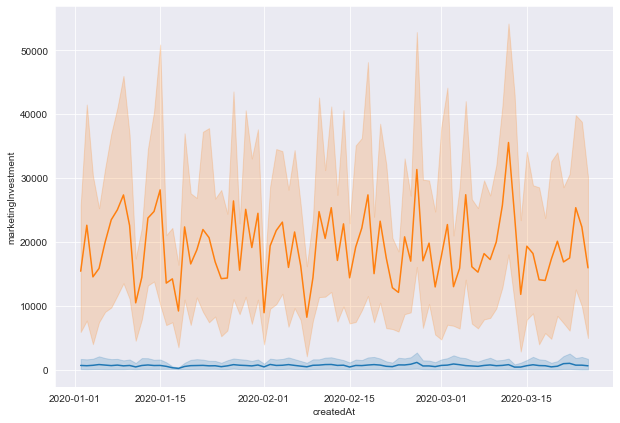

In [34]:
plt.figure(figsize = (10, 7))
inv = sns.lineplot(data['createdAt'], data['marketingInvestment'], legend = True)
rev = sns.lineplot(data['createdAt'], data['revenue'], legend = True)
#plt.legend({rev : 'rev', inv :'inv'})
plt.plot()

# A/B TESTS

In [35]:
import sys
sys.path.insert(0, 'C:\\Users\\HP\Downloads\\mybooks\\project\\ads-proj\\ad-sales-ml-proj\\modules')

In [36]:
from anova import *

In [37]:
# distribution of conversion rates

CHI-SQUARE ANALYSIS OF CONVERSION PER PLATFORM

In [38]:

sys.path.insert(1,'C:\\Users\\HP\\Downloads\\mybooks\\project\\ads-proj\\ad-sales-ml-proj\\modules' )

In [39]:
from chisquare import *

In [40]:
total_interactions = sum(byPlatform['visits'])
total_conversions = sum(byPlatform['conversions'])

In [41]:
byPlatform['expected'] = total_conversions/byPlatform['platformCode'].nunique()

In [42]:
byPlatform

,platformCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,conversionRate,expected
0,AdWords,852549.40,16667747,226106,237503,2887,2803,0.012156,712.75
1,Adform,0.00,0,1,4,0,0,0.000000,712.75
2,Bing,0.00,0,0,3,0,0,0.000000,712.75
3,FacebookBusinessAdsManager,8849.97,437780,9433,0,0,0,NaN,712.75
4,FirmyCz,6684.82,58330,324,158,2,2,0.012658,712.75
5,HeurekaCz,10647.19,0,2620,3923,101,99,0.025746,712.75
6,Not tracked,0.00,0,0,0,1266,1141,inf,712.75
7,RtbHouse,132249.40,2844232,66618,47593,379,347,0.007963,712.75
8,Silverpop,107096.63,0,0,107919,1719,1654,0.015929,712.75
9,Sklik,63368.63,1570740,27423,29991,571,547,0.019039,712.75


In [43]:
chi_square = chi2(byPlatform, 'conversions', 'expected')

TypeError: unsupported operand type(s) for -: 'str' and 'str'